In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    @MafeCarrascal
    @CathyJuvinao
    @FabianSanabriaS
    @DanielSamperO
    @ClaudiaLopez
    @AngelicaLozanoC
    @AntanasMockus
    @ArielAnaliza
    @datoatipico
    @Rivas_Santiago
    @Uriasv
    @cielo_rusinque
    @MeDicenWally
    @intiasprilla
    @navarrowolff
    @angelamrobledo
    @DavidRacero
    @MirandaBogota
    @MauroToroO
    @conycamelo
    @eljulisastoque
    @JULIOC_HERRERA
    @AlvaroUribeVel
    @MariaFdaCabal
    @natiibedoya
    @CatalinaSuarezB
    @MiguelPoloP

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["cuentas_tweets_2.json","cuentas_tweets_1.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 287588 
 Tweets con usuario identificado     : 287588 
 Tweets con nombre de usuario        : 287588 
 Total de Menciones en los tweets    : 771726 
 Tweets con menciones identificadas  : 287588 
 Tweets con dispositivos registrado  : 287588 
 Tweets con fechas registradas       : 287588 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 59595


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    179385
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       58756
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       24853
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  19566
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         3727
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        309
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>              249
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>           233
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    168
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>             37
<a href="https://twitterrific.com/ios" rel="

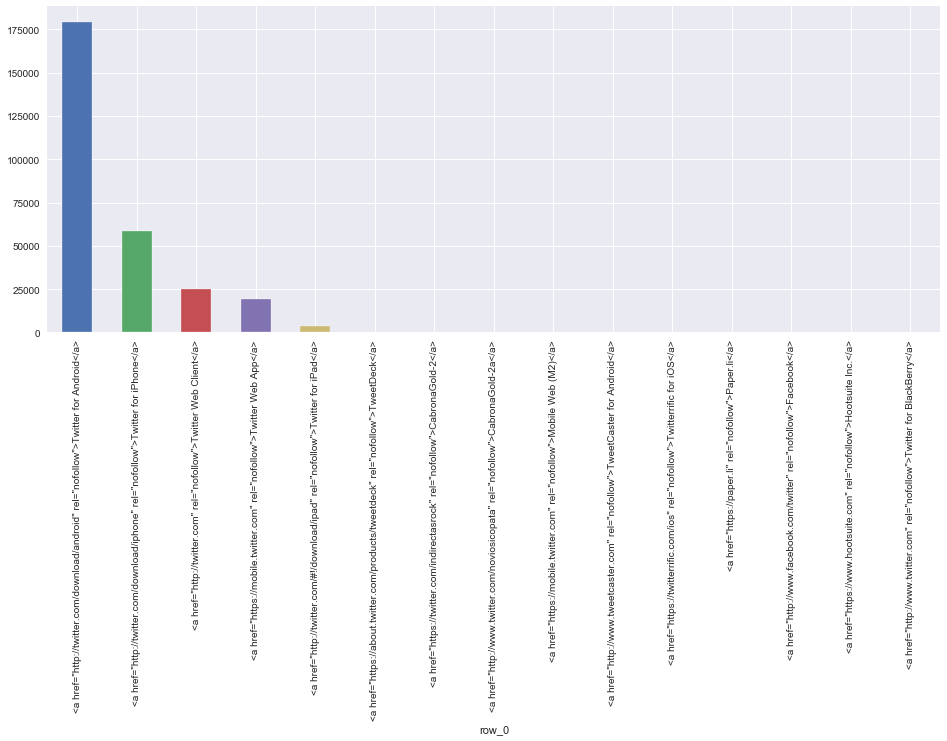

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


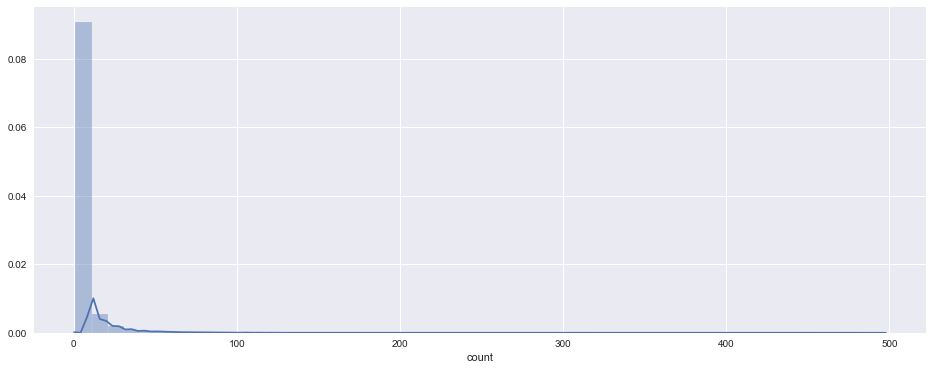

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    59595.000
mean         4.826
std         11.472
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        497.000
Name: count, dtype: float64

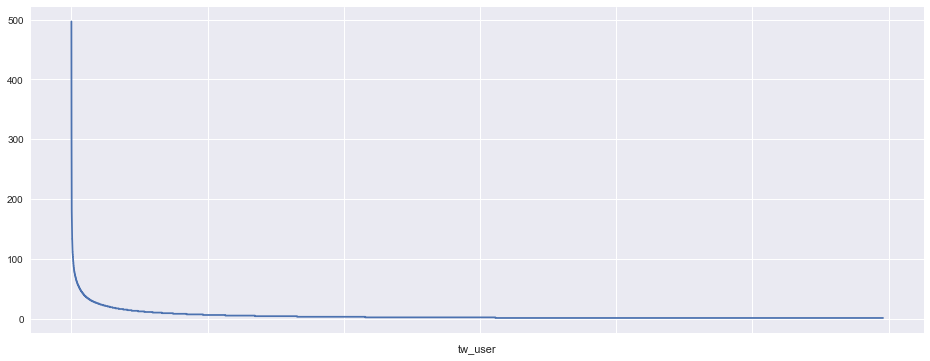

In [8]:
ids_freqs.plot(figsize=(16, 6))

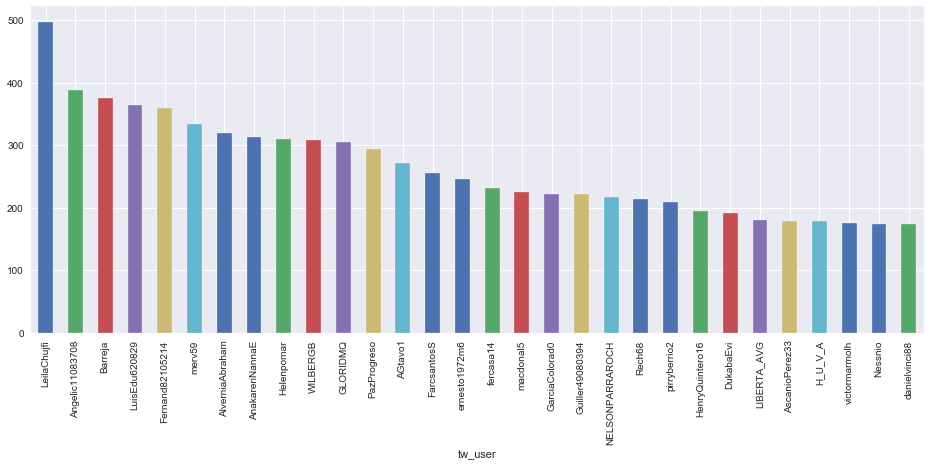

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
LeilaChujfi        497
Angelic11083708    388
Barreja            375
LuisEdu620829      364
Fernand82105214    359
merv59             334
AlverniaAbraham    320
AnakareriNannaE    313
Helenpomar         309
WILBERGB           308
GLORIDMQ           305
PazProgreso        293
AGtavo1            271
FarcsantosS        256
ernesto1972m6      246
fercasa14          231
macdonal5          225
GarciaColorad0     222
Guiller49080394    222
NELSONPARRAROCH    217
Rech68             213
pirryberrio2       209
HenryQuintero16    195
DukabaEvi          192
LIBERTA_AVG        180
AscanioPerez33     178
H_U_V_A            178
victormarmolh      175
Nessnio            174
elBogotano         173
danielvinci88      173
Lucas89777309      170
maxmaye15354547    168
LinaLeo73908100    167
ArielCastill1      166
wilromerol         166
blackj121          166
DonMarenco         165
hermaibo           165
CarrillonavasG     160
DOGGY1959          158
marco_caldon       158
AdrinEspinosaAR    157
Cla

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

22988

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 23025


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(287588, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

ClaudiaLopez       43278
DanielSamperO      35309
MafeCarrascal      29257
petrogustavo       29046
navarrowolff       23970
natiibedoya        17569
angelamrobledo     13870
MariaFdaCabal      12058
IvanDuque          11240
Uriasv             11007
AngelicaLozanoC     9550
DELAESPRIELLAE      8791
NanyPardo           8157
DavidRacero         6415
AlvaroUribeVel      6272
sergio_fajardo      5953
matadoreltiempo     5062
fecode              4159
CatalinaSuarezB     4097
GustavoBolivar      3919
dtype: int64


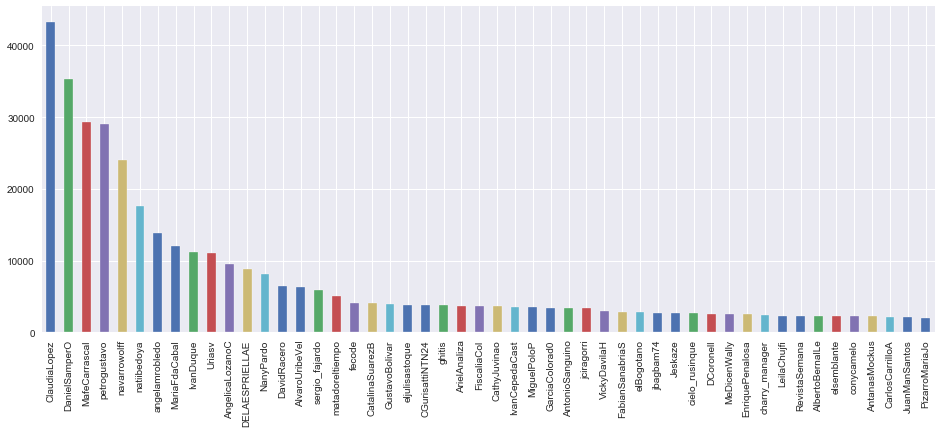

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

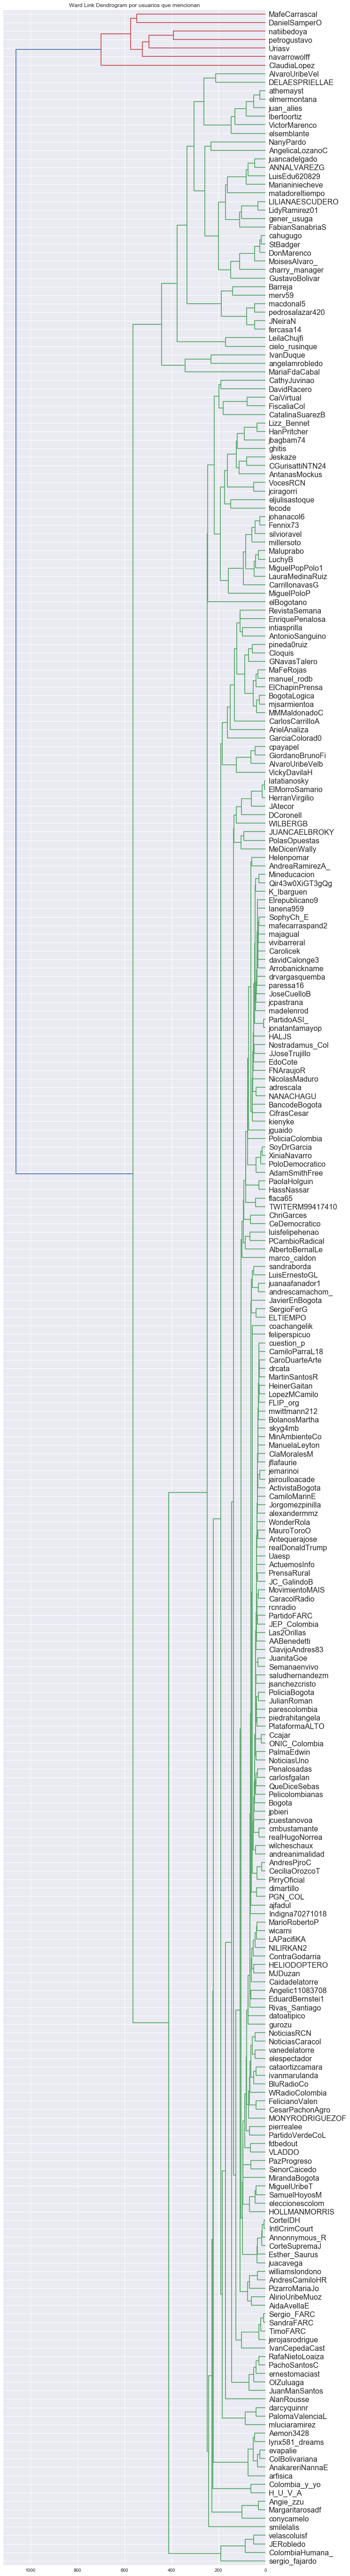

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        2058.0
Barreja            1540.0
merv59             1184.0
AGtavo1            1151.0
macdonal5          1098.0
AnakareriNannaE    1019.0
DonMarenco          956.0
LuisEdu620829       923.0
fercasa14           761.0
CarrillonavasG      756.0
Angelic11083708     724.0
Helenpomar          678.0
WILBERGB            618.0
GLORIDMQ            602.0
maxmaye15354547     593.0
ernesto1972m6       571.0
Fernand82105214     550.0
AlverniaAbraham     510.0
PazProgreso         500.0
FarcsantosS         484.0
cahugugo            481.0
MiguelPopPolo1      469.0
Rech68              453.0
wilromerol          449.0
pirryberrio2        443.0
HenryQuintero16     430.0
Negro102358         429.0
pedrosalazar420     409.0
DOGGY1959           397.0
H_U_V_A             390.0
victormarmolh       386.0
marco_caldon        385.0
NELSONPARRAROCH     378.0
AscanioPerez33      372.0
Colombia_y_yo       367.0
poetapabon          348.0
mggarciab           343.0
Clafe64             342.0
olg12020    

In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

ClaudiaLopez       43278.0
DanielSamperO      35309.0
MafeCarrascal      29257.0
petrogustavo       29046.0
navarrowolff       23970.0
natiibedoya        17569.0
angelamrobledo     13870.0
MariaFdaCabal      12058.0
IvanDuque          11240.0
Uriasv             11007.0
AngelicaLozanoC     9550.0
DELAESPRIELLAE      8791.0
NanyPardo           8157.0
DavidRacero         6415.0
AlvaroUribeVel      6272.0
sergio_fajardo      5953.0
matadoreltiempo     5062.0
fecode              4159.0
CatalinaSuarezB     4097.0
GustavoBolivar      3919.0
eljulisastoque      3784.0
CGurisattiNTN24     3779.0
ghitis              3777.0
ArielAnaliza        3726.0
FiscaliaCol         3725.0
CathyJuvinao        3701.0
IvanCepedaCast      3602.0
MiguelPoloP         3584.0
GarciaColorad0      3446.0
AntonioSanguino     3423.0
jciragorri          3394.0
VickyDavilaH        2955.0
FabianSanabriaS     2816.0
elBogotano          2800.0
jbagbam74           2743.0
Jeskaze             2728.0
cielo_rusinque      2661.0
D

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

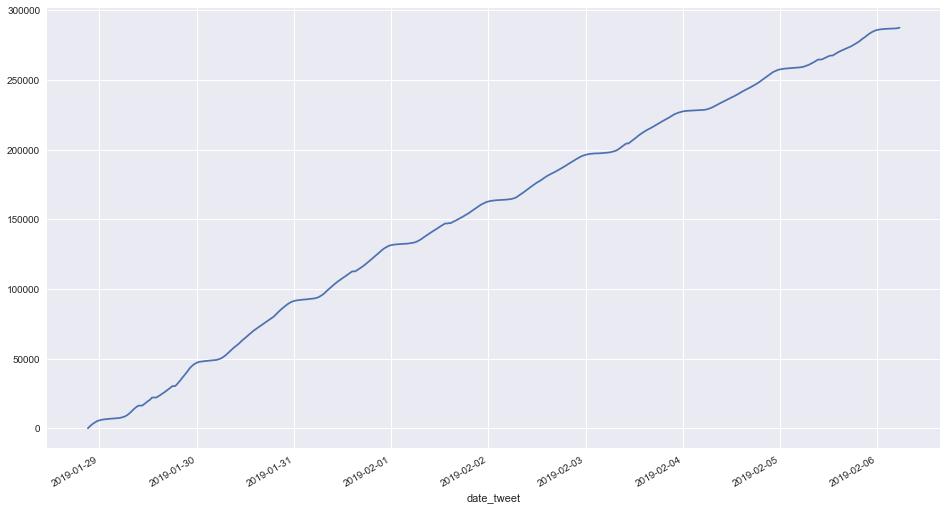

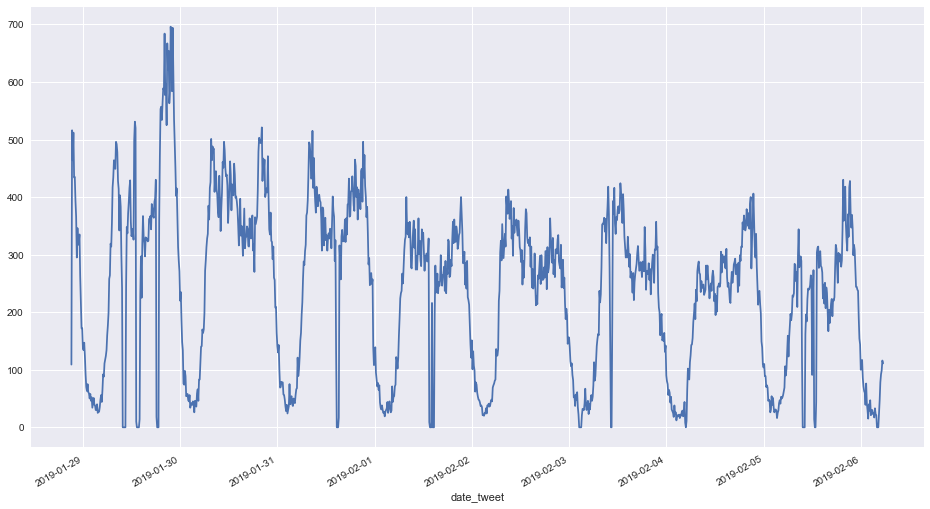

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
LeilaChujfi        497
Barreja            375
LuisEdu620829      364
merv59             334
AnakareriNannaE    313
AGtavo1            271
fercasa14          231
macdonal5          225
DonMarenco         165
CarrillonavasG     160
dtype: int64

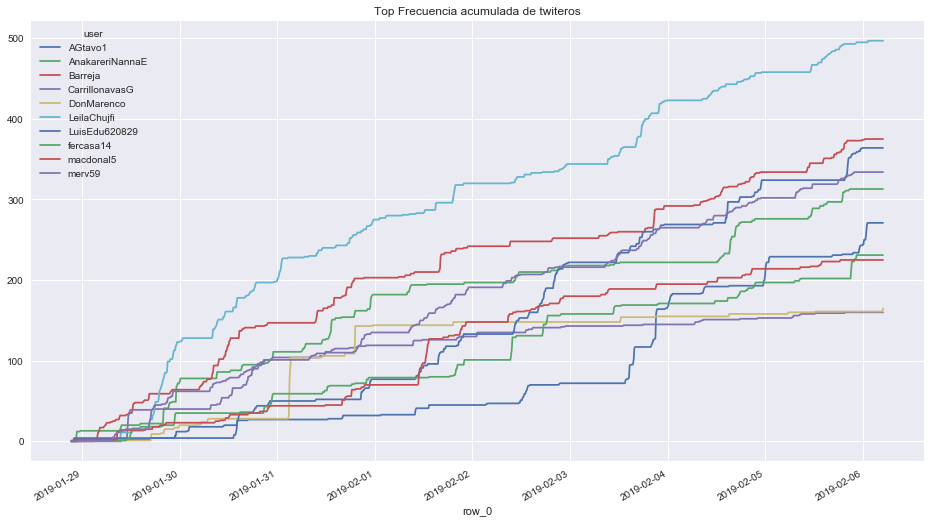

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

ClaudiaLopez      43278
DanielSamperO     35309
MafeCarrascal     29257
petrogustavo      29046
navarrowolff      23970
natiibedoya       17569
angelamrobledo    13870
MariaFdaCabal     12058
IvanDuque         11240
Uriasv            11007
dtype: int64

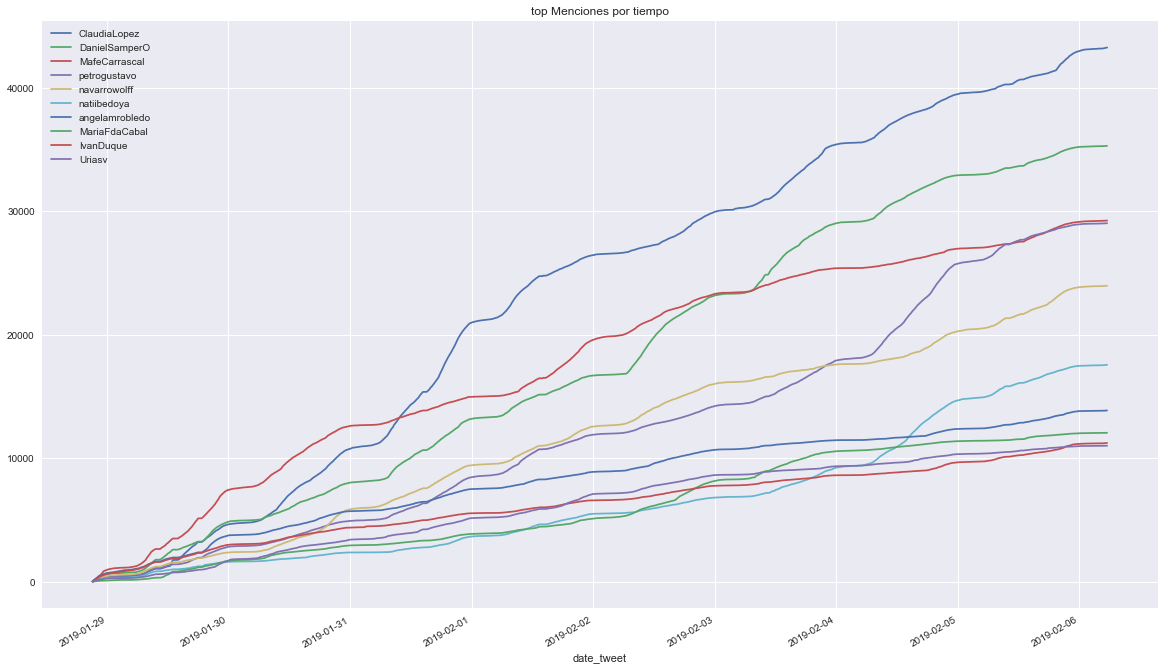

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

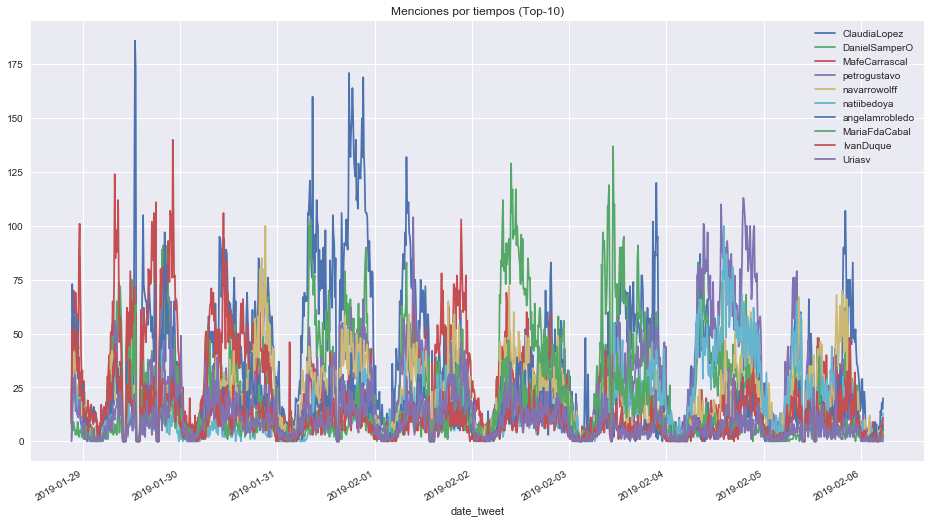

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [41]:
mat_size=30
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,ClaudiaLopez,DanielSamperO,MafeCarrascal,petrogustavo,navarrowolff,natiibedoya,angelamrobledo,MariaFdaCabal,IvanDuque,Uriasv,...,eljulisastoque,CGurisattiNTN24,ghitis,ArielAnaliza,FiscaliaCol,CathyJuvinao,IvanCepedaCast,MiguelPoloP,GarciaColorad0,AntonioSanguino
LeilaChujfi,5.0,39.0,34.0,86.0,10.0,2.0,18.0,3.0,9.0,24.0,...,5.0,0.0,0.0,0.0,9.0,3.0,6.0,11.0,8.0,1.0
Barreja,8.0,22.0,17.0,56.0,9.0,6.0,18.0,2.0,20.0,63.0,...,1.0,0.0,0.0,3.0,7.0,2.0,8.0,1.0,4.0,3.0
merv59,9.0,19.0,17.0,37.0,4.0,4.0,18.0,4.0,20.0,30.0,...,1.0,0.0,0.0,19.0,5.0,7.0,8.0,6.0,1.0,1.0
AGtavo1,210.0,0.0,13.0,21.0,106.0,4.0,0.0,7.0,4.0,0.0,...,3.0,11.0,15.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
macdonal5,13.0,5.0,11.0,87.0,6.0,19.0,4.0,1.0,22.0,97.0,...,0.0,1.0,0.0,6.0,5.0,1.0,6.0,0.0,1.0,2.0


In [42]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

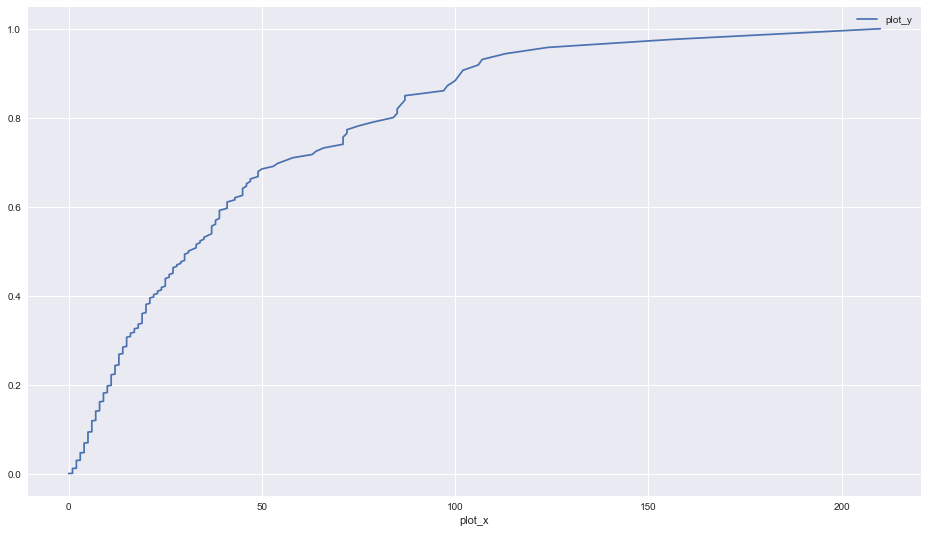

In [43]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [44]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

22.0
106


,tw_de,tw_para,freq
3,AGtavo1,ClaudiaLopez,210.0
77,AlverniaAbraham,MafeCarrascal,156.0
453,AGtavo1,sergio_fajardo,124.0
275,AnakareriNannaE,Uriasv,113.0
46,Fernand82105214,DanielSamperO,107.0
123,AGtavo1,navarrowolff,106.0
299,H_U_V_A,Uriasv,102.0
17,AlverniaAbraham,ClaudiaLopez,101.0
76,Fernand82105214,MafeCarrascal,100.0
54,pirryberrio2,DanielSamperO,98.0


C:\Users\Alexis\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


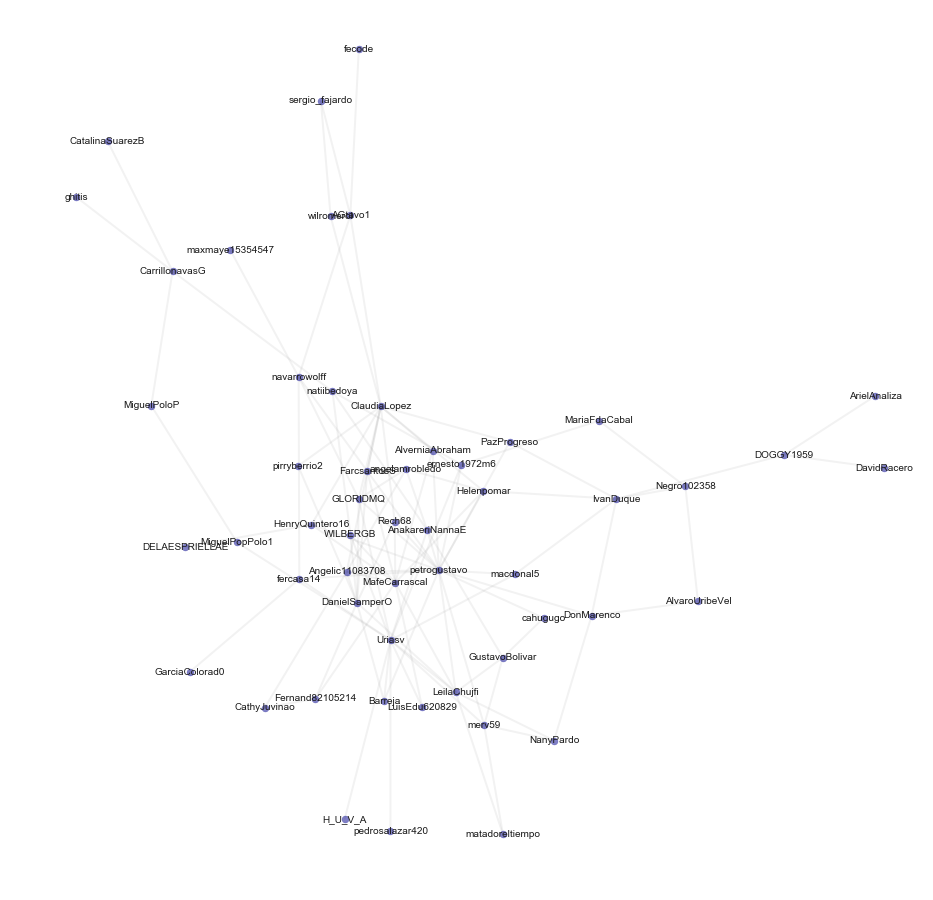

In [45]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

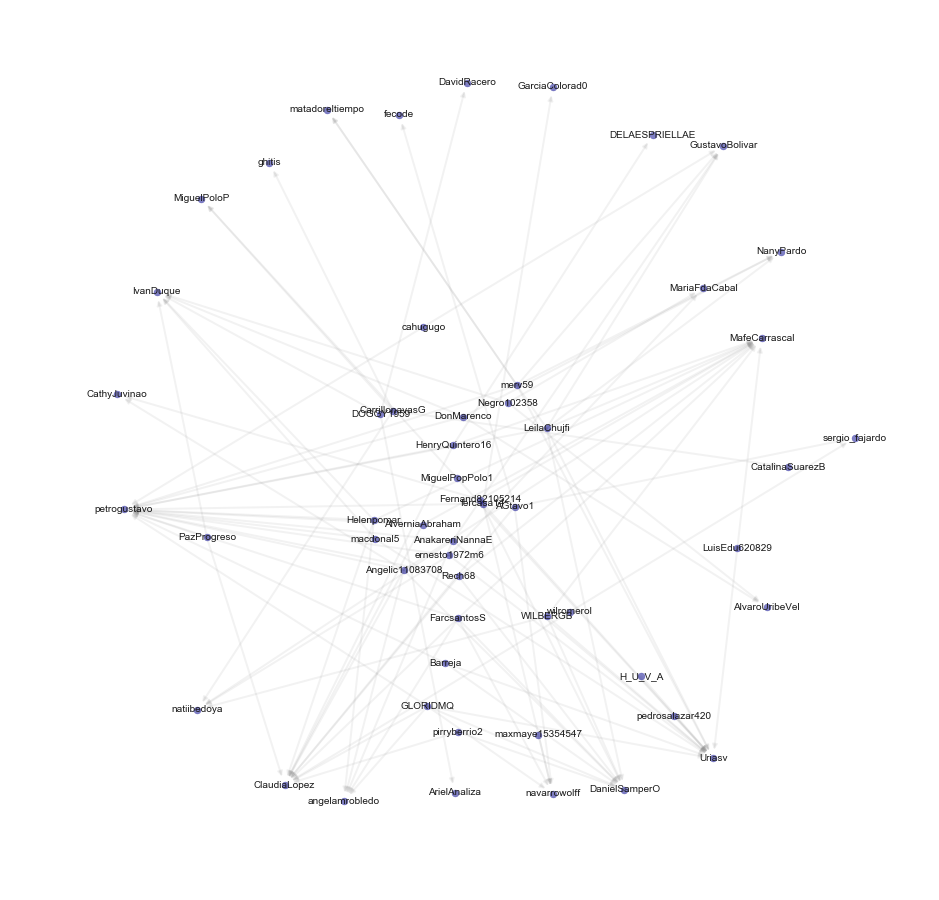

In [46]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

C:\Users\Alexis\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


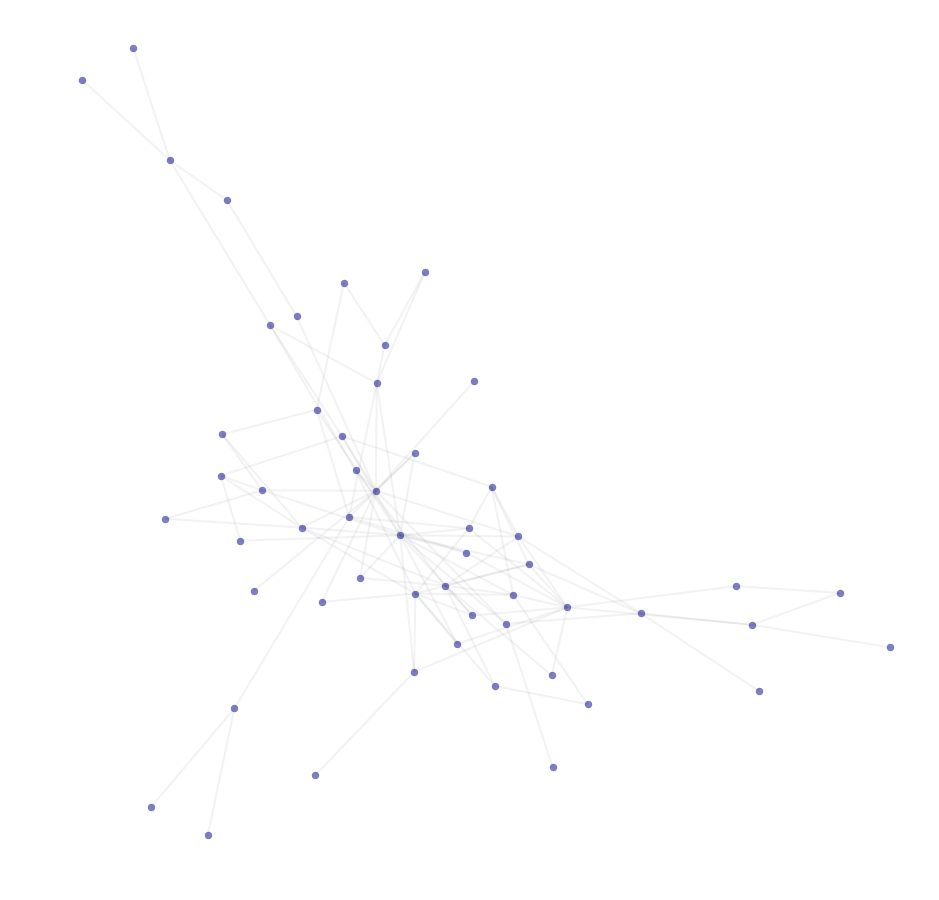

In [47]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()